In [23]:
import matplotlib.pyplot as plt
import datetime
import csv
import os
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid")

In [37]:
file_path = "4_2v_sampling.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data.head()

,Index,Reading,Unit,Range Digits,Disp Digits,Math,Start Group,Limit1 High,Limit1 Low,Limit2 High,...,Value,Unit.1,Digits,Output,Sense,Source Limit,Overtemp,Date,Time,Fractional Seconds
0,1,0.017145,Amp DC,0.1,6.5,F,F,F,F,F,...,4.199152,Volt DC,10,T,2W,F,F,02/29/2024,19:37:46,0.875351
1,2,0.021484,Amp DC,0.1,6.5,F,F,F,F,F,...,4.177862,Volt DC,10,T,2W,F,F,02/29/2024,19:37:46,0.878781
2,3,0.013865,Amp DC,0.1,6.5,F,F,F,F,F,...,4.200268,Volt DC,10,T,2W,F,F,02/29/2024,19:37:46,0.882209
3,4,0.014147,Amp DC,0.1,6.5,F,F,F,F,F,...,4.200303,Volt DC,10,T,2W,F,F,02/29/2024,19:37:46,0.885644
4,5,0.013408,Amp DC,0.1,6.5,F,F,F,F,F,...,4.194284,Volt DC,10,T,2W,F,F,02/29/2024,19:37:46,0.889084


In [38]:
# Keeping only the necessary columns and merging 'Time' and 'Fractional Seconds'
data_cleaned = data[['Reading', 'Value', 'Date', 'Time', 'Fractional Seconds']].copy()

# Merging 'Time' and 'Fractional Seconds' into a single 'DateTime' column
# The fractional seconds will be added as milliseconds to the 'Time' column
data_cleaned['DateTime'] = pd.to_datetime(data_cleaned['Date'] + ' ' + data_cleaned['Time']) + pd.to_timedelta(data_cleaned['Fractional Seconds'], unit='s')

# Dropping the original 'Date', 'Time', and 'Fractional Seconds' columns as they are now merged into 'DateTime'
data_cleaned.drop(['Date', 'Time', 'Fractional Seconds'], axis=1, inplace=True)
# Converting current from Amperes to milliamperes (mA)
data_cleaned['Reading'] = data_cleaned['Reading'] * 1000
# Displaying the updated DataFrame to ensure correctness
data_cleaned.head()


,Reading,Value,DateTime
0,17.145026,4.199152,2024-02-29 19:37:46.875350540
1,21.484066,4.177862,2024-02-29 19:37:46.878780960
2,13.864825,4.200268,2024-02-29 19:37:46.882208780
3,14.146784,4.200303,2024-02-29 19:37:46.885644380
4,13.407843,4.194284,2024-02-29 19:37:46.889083740


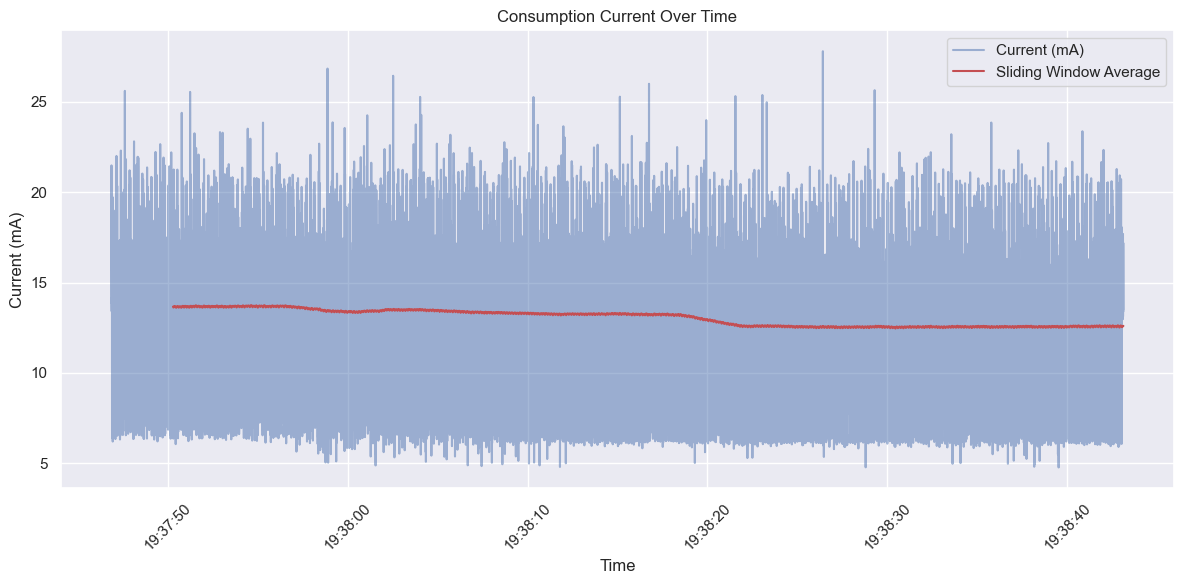

In [39]:
# Calculating a sliding window average (rolling mean) with a window size of 10
window_size = 1000
data_cleaned['Rolling Mean'] = data_cleaned['Reading'].rolling(window=window_size).mean()

# Creating the plot with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=data_cleaned, x='DateTime', y='Reading', label='Current (mA)', color='C0', alpha=0.5)
sns.lineplot(data=data_cleaned, x='DateTime', y='Rolling Mean', label='Sliding Window Average', color='C3')

plt.title('Consumption Current Over Time')
plt.xlabel('Time')
plt.ylabel('Current (mA)')
plt.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to make room for the rotated date labels

plt.show()
